<a href="https://colab.research.google.com/github/deandri3000/Kelompok3-SI4703-DataMining-/blob/main/Kelompok_3_SI4703_DATMIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Klasifikasi Logistic Regression**

#### **Data Understanding**

Membaca dan menampilkan beberapa baris awal

In [ ]:
import pandas as pd
df = pd.read_csv("Telco customer churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


lihat ringkasan statistik dari dataset

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### **Data Preperation**

lihat data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


data selection

In [ ]:
selected_columns = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'tenure',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'MonthlyCharges',
    'TotalCharges',
    'Churn'
]

df = df[selected_columns]

print("Selected data:\n", df.head())

Selected data:
    gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Y

Data cleaning

In [ ]:
df_cleaned = df.copy()

# a. Menghapus data duplikat
df_cleaned.drop_duplicates(inplace=True)

# b. Mengatasi nilai yang hilang atau tidak valid
# TotalCharges memiliki nilai kosong yang sebenarnya bertipe objek, perlu dikonversi ke numerik terlebih dahulu
df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'], errors='coerce')

# c. Validasi rentang data:
df_cleaned = df_cleaned[
    (df_cleaned['SeniorCitizen'].isin([0, 1])) &
    (df_cleaned['MonthlyCharges'] >= 0) &
    (df_cleaned['TotalCharges'] >= 0)
]

df_cleaned.info(), df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

(None,
    gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  Female              0     Yes         No       1           No   
 1    Male              0      No         No      34          Yes   
 2    Male              0      No         No       2          Yes   
 3    Male              0      No         No      45           No   
 4  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity OnlineBackup  \
 0  No phone service             DSL             No          Yes   
 1                No             DSL            Yes           No   
 2                No             DSL            Yes          Yes   
 3  No phone service             DSL            Yes           No   
 4                No     Fiber optic             No           No   
 
   DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
 0               No          No          No              No  Month-to-month   
 1       

#### **Data Transformation**

Normalisasi kolom numerik (skala antara 0 dan 1).
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import pandas as pd


print("--- Data sebelum Transformasi (df_cleaned head) ---")
print(df_cleaned.head())
print("\nData Types sebelum transformasi:")
print(df_cleaned.dtypes)


print("\n--- Tahap 1: Label Encoding untuk Kolom Kategorikal ---")
le = LabelEncoder()
for col in df_cleaned.select_dtypes(include='object').columns:
    if col != 'customerID':
        df_cleaned[col] = le.fit_transform(df_cleaned[col])

print("\nData Types setelah Label Encoding:")
print(df_cleaned.dtypes)
print("\nKolom bertipe 'object' yang tersisa (jika ada):")
print(df_cleaned.select_dtypes(include='object').columns.tolist())


print("\n--- Tahap 2: Normalize Kolom Numerik (MinMaxScaler) ---")

df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'], errors='coerce')
df_cleaned['TotalCharges'].fillna(df_cleaned['TotalCharges'].mean(), inplace=True)


scaler = MinMaxScaler()
df_cleaned[['SeniorCitizen', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
    df_cleaned[['SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
)

print("\n--- Hasil Transformasi (df_cleaned head) ---")
print("Transformed data:\n", df_cleaned.head())




--- Data sebelum Transformasi (df_cleaned head) ---
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No

<ipython-input-67-048ae8d3295e>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['TotalCharges'].fillna(df_cleaned['TotalCharges'].mean(), inplace=True)


#### **Data Reduction klasifikasi**



In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



print("\n--- Langkah 3: Pemisahan Fitur (X) dan Target (y) & Balancing (SMOTE) ---")


X = df_cleaned.drop(columns=["Churn", "customerID"], errors='ignore')
y = df_cleaned["Churn"]


print(f"Shape of X BEFORE SMOTE: {X.shape}")
print(f"Shape of y BEFORE SMOTE: {y.shape}")
print("Distribusi kelas sebelum balancing:\n", pd.Series(y).value_counts())

# Terapkan SMOTE untuk menyeimbangkan kelas
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Shape of X_resampled AFTER SMOTE: {X_resampled.shape}")
print(f"Shape of y_resampled AFTER SMOTE: {y.shape}") # Perbaiki y_resampled jika sebelumnya y
print("Distribusi kelas setelah balancing:\n", pd.Series(y_resampled).value_counts())


print("\n--- Langkah 4: Standarisasi Fitur (StandardScaler) ---")

scaler = StandardScaler()
# Terapkan standarisasi pada X_resampled (fitur setelah SMOTE)
X_resampled_scaled = scaler.fit_transform(X_resampled)

print(f"Shape of X_resampled_scaled (after Standardization): {X_resampled_scaled.shape}")
print("First 5 rows of X_resampled_scaled (NumPy array, sample):\n", X_resampled_scaled[:5])

print("\n--- Langkah 5: Reduksi Dimensi (PCA) ---")

pca = PCA(n_components=2, random_state=42)
# Terapkan PCA pada data yang sudah diskalakan
X_pca_result = pca.fit_transform(X_resampled_scaled)

# LANGKAH SETELAH SNIPPET A (setelah X_pca_result didapatkan)
# DAN SEBELUM BAGIAN PENYIMPANAN ANDA (SNIPPET B)

from sklearn.cluster import KMeans # Pastikan sudah diimport

optimal_k = 5 # Ganti dengan nilai K optimal Anda
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
kmeans_model.fit(X_pca_result) # Latih K-Means pada data hasil PCA dari Snippet A Anda


print(f"Model K-Means telah dilatih dengan K={optimal_k} pada X_pca_result.")


print(f"Shape of X_pca_result (after PCA): {X_pca_result.shape}")

df_pca_display = pd.DataFrame(data=X_pca_result, columns=['PCA 1', 'PCA 2'])

print("\nHasil Reduksi Dimensi (PCA):")
print(df_pca_display.head())



--- Langkah 3: Pemisahan Fitur (X) dan Target (y) & Balancing (SMOTE) ---
Shape of X BEFORE SMOTE: (7010, 19)
Shape of y BEFORE SMOTE: (7010,)
Distribusi kelas sebelum balancing:
 Churn
0    5153
1    1857
Name: count, dtype: int64
Shape of X_resampled AFTER SMOTE: (10306, 19)
Shape of y_resampled AFTER SMOTE: (7010,)
Distribusi kelas setelah balancing:
 Churn
0    5153
1    5153
Name: count, dtype: int64

--- Langkah 4: Standarisasi Fitur (StandardScaler) ---
Shape of X_resampled_scaled (after Standardization): (10306, 19)
First 5 rows of X_resampled_scaled (NumPy array, sample):
 [[-0.91581408 -0.50992094  1.24285613 -0.53553931 -1.11766821 -2.95341184
   0.06295316 -1.23075664 -0.75716031  1.37399469 -0.90441681 -0.76855802
  -1.05954298 -1.06665008 -0.64376181  0.79986077  0.42115903 -1.34349974
  -0.9298449 ]
 [ 1.09192468 -0.50992094 -0.80459836 -0.53553931  0.2590575   0.33859145
  -0.99199843 -1.23075664  1.66772911 -0.89730041  1.36317099 -0.76855802
  -1.05954298 -1.06665008

#### **Modeling Regresi**



Import

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X = X_pca_result
y = y_resampled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic = LogisticRegression(random_state=42, solver='liblinear')
logistic.fit(X_train,y_train)

y_pred = logistic.predict(X_test)
y_pred_proba = logistic.predict_proba(X_test)[:, 1]

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

MSE: 0.22550921435499516
Accuracy: 0.7745
Precision: 0.7669
Recall: 0.7856
F1 Score: 0.7761
ROC AUC Score: 0.8440


Buat visualisasi ROC-AUC

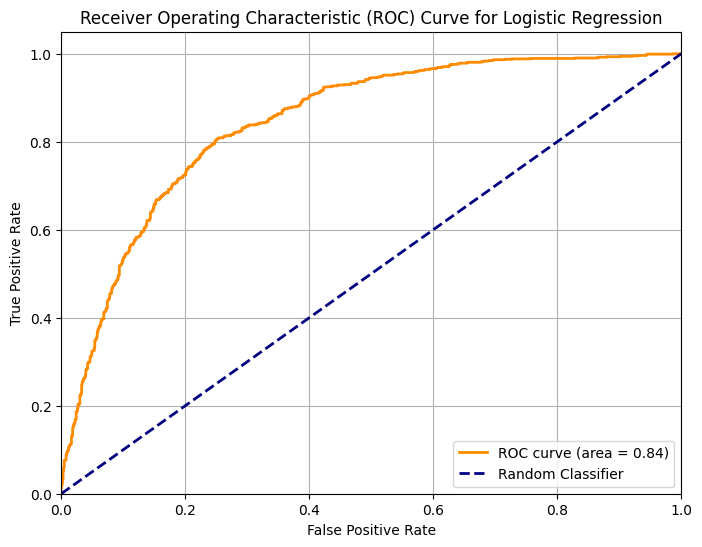

ROC AUC Score for Logistic Regression: 0.8440


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import numpy as np

# Dapatkan probabilitas prediksi untuk kelas positif (churn) pada test set
# predict_proba() mengembalikan probabilitas untuk kedua kelas, kita ambil kolom kedua (indeks 1)
y_pred_proba = logistic.predict_proba(X_test)[:, 1]

# Hitung False Positive Rate (fpr), True Positive Rate (tpr), dan Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Hitung Area Under the Curve (AUC)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Buat plot kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier') # Garis diagonal untuk classifier acak
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"ROC AUC Score for Logistic Regression: {roc_auc:.4f}")

#### **K- Means Clustering**

Data understanding

In [ ]:
df_2 = pd.read_csv('Telco customer churn.csv')
df_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_2.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Data Preprocessing

In [ ]:
# Untuk clustering, menggunakan semua fitur pelanggan kecuali 'customerID'
# dan 'Churn' (karena Churn adalah target klasifikasi, bukan fitur untuk pengelompokan unsupervised).
features_for_clustering = df.drop(columns=['customerID', 'Churn'], errors='ignore')

In [ ]:
df_2.duplicated().sum()

np.int64(0)

In [ ]:
df_2.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical = df_2.select_dtypes(include=["int64", "float64"])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numerical)

# 1. Tentukan Kolom Numerik Spesifik untuk K-Means
numerical_cols_for_kmeans = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
df_kmeans_features = df_cleaned[numerical_cols_for_kmeans].copy()

# 2. Imputasi NaN (jika ada) pada fitur yang dipilih

for col in numerical_cols_for_kmeans:
    if df_kmeans_features[col].isnull().any():
        df_kmeans_features[col].fillna(df_kmeans_features[col].median(), inplace=True)


if df_kmeans_features.isnull().any().any():
    raise ValueError("Masih ada nilai NaN di fitur K-Means setelah imputasi. Harap periksa.")

print(f"Fitur yang digunakan untuk K-Means: {numerical_cols_for_kmeans}")
print(f"Shape data fitur K-Means: {df_kmeans_features.shape}")

Fitur yang digunakan untuk K-Means: ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
Shape data fitur K-Means: (7010, 4)


Gunakan PCA untuk mereduksi fitur numerik menjadi 2 dimensi

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_PCA = pca.fit_transform(df_scaled)

## **3. Build Model K means**

In [ ]:
from sklearn.cluster import KMeans

Gunakan Elbow Method untuk menemukan jumlah klaster yang optimal

In [ ]:
wcss = []
for i in range(1,13):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Visualisasikan plot Elbow Method

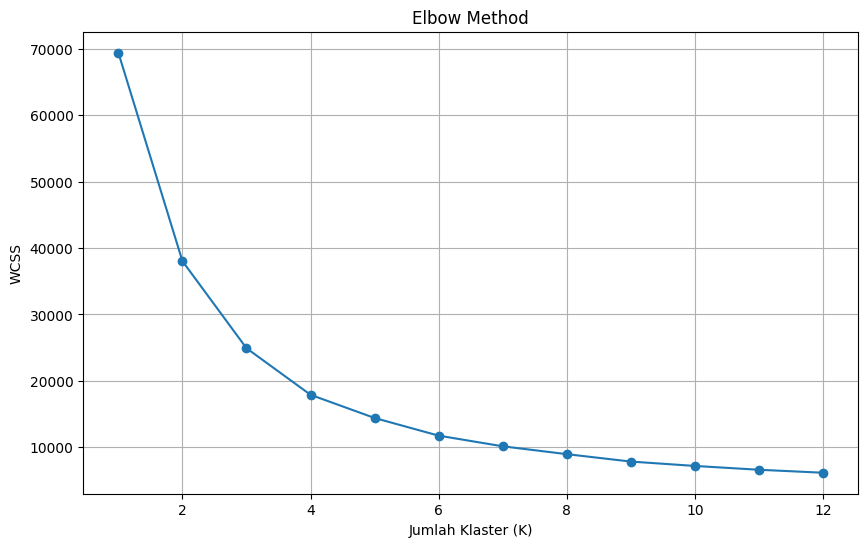

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,13), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Klaster (K)")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

Lakukan Klasterisasi K-Means. Cocokkan jumlh klaster dengan **k optimal** pada hasil plot elbow method sebelumnya

*hint: Lihat grafik elbow, pilih titik dengan tekukan paling tajam (sebelum garis mulai datar atau stabil jaraknya).*

In [ ]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit(df_PCA)

## **4. Evaluate the model**

Setelah membangun model dengan melatih dan memprediksi, selanjutnya praktikan **mengevaluasi model** dengan **Visualisasi Hasil Klasterisasi** dan **Silhouette Score**

In [ ]:
from sklearn.metrics import silhouette_score
import seaborn as sns

**Visualisasi** plot klusterisasi k-means

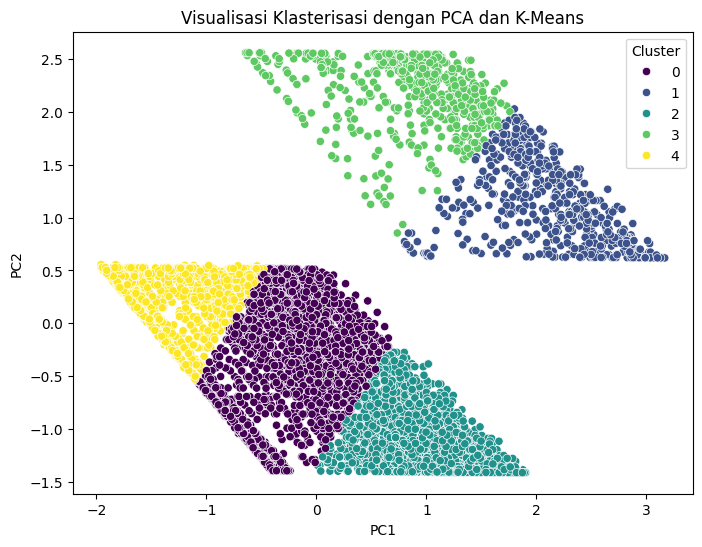

In [ ]:
pca_df = pd.DataFrame(data=df_PCA, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels.labels_

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('Visualisasi Klasterisasi dengan PCA dan K-Means')
plt.show()

Menghitung **Silhouette score**

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

# Ambil sample 1000 data dari PCA result
pca_sample = resample(pca_df, n_samples=1000, random_state=42)

# Prediksi cluster untuk sample (pakai model yang sudah dilatih)
sample_labels = labels.labels_[pca_sample.index]

# Hitung silhouette score pada sample
sil_score = silhouette_score(pca_sample, sample_labels)
print(f"Silhouette Score (sampled): {sil_score}")


Silhouette Score (sampled): 0.731452748419479


#### **Deployment**

Save model

Semua artefak K-Means (model, PCA, scaler, fitur) telah disimpan dalam satu file: kmeans_clustering.pkl


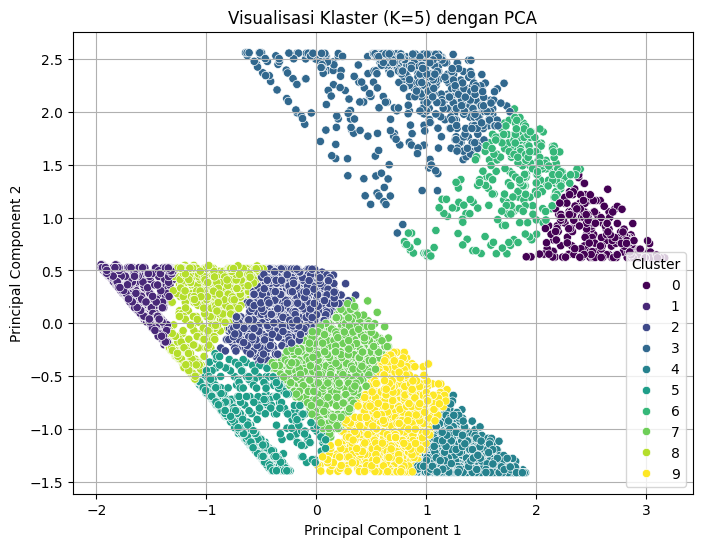

Silhouette Score untuk K=5: 0.47643168530692853


In [ ]:


# --- MODIFIKASI BAGIAN PENYIMPANAN MODEL ---
import joblib

# Buat dictionary untuk menyimpan semua artefak
all_kmeans_artifacts = {
    'model': kmeans_model,           # Kunci: 'model'
    'pca': pca,                      # Kunci: 'pca'
    'scaler': scaler,                # Kunci: 'scaler'
    'features': numerical_cols_for_kmeans      # Kunci: 'features'
}

# Simpan dictionary ini ke dalam satu file .pkl
nama_file_pkl_gabungan = "kmeans_clustering.pkl"
joblib.dump(all_kmeans_artifacts, nama_file_pkl_gabungan)

print(f"Semua artefak K-Means (model, PCA, scaler, fitur) telah disimpan dalam satu file: {nama_file_pkl_gabungan}")
# --- AKHIR MODIFIKASI BAGIAN PENYIMPANAN ---



# Untuk visualisasi
pca_df_final = pd.DataFrame(data=pca_df, columns=['PC1', 'PC2'])
pca_df_final['Cluster'] = model.labels_

# Visualisasi hasil klasterisasi
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df_final, palette='viridis', legend="full")
plt.title(f'Visualisasi Klaster (K={optimal_k}) dengan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Hitung Silhouette Score untuk model final
from sklearn.metrics import silhouette_score
sil_score_final = silhouette_score(pca_df, model.labels_)
print(f"Silhouette Score untuk K={optimal_k}: {sil_score_final}")

Konfigurasi Streamlit untuk deployment (k-means)

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [ ]:
pip install joblib scikit-learn pandas numpy matplotlib seaborn imbalanced-learn

Konfigurasi Streamlit untuk deployment (klasifikasi)

In [ ]:
pip install pyngrok

Ekspos streamlit local ke public

In [ ]:
# ============== KODE UNTUK DIJALANKAN DALAM SATU SEL JUPYTER NOTEBOOK ==============

from pyngrok import ngrok, conf
import threading
import time
import os
import subprocess
# import shlex # Tidak wajib jika nama file tidak mengandung spasi

# --- 1. Konfigurasi Ngrok ---

NGROK_AUTH_TOKEN = "2wvSlvhaWQYM8kbi6ybkyXyIXrC_3q95trDPYwijw4o2WuEqW"
if NGROK_AUTH_TOKEN:
    try:
        conf.get_default().auth_token = NGROK_AUTH_TOKEN
        print("INFO: Authtoken ngrok telah dikonfigurasi.")
    except Exception as e_conf:
        print(f"WARNING: Gagal mengkonfigurasi authtoken ngrok secara programatik: {e_conf}")
        print("Pastikan Anda sudah mengkonfigurasi authtoken via CLI ngrok: ngrok config add-authtoken <TOKEN_ANDA>")
else:
    print("PERINGATAN: Authtoken ngrok tidak diset. Tunnel mungkin memiliki batasan atau gagal.")

# --- 2. Nama File Aplikasi Streamlit Anda ---

STREAMLIT_PYTHON_FILE = "streamlit_kmeans_app.py"

# --- 3. Fungsi untuk Menjalankan Server Streamlit ---
def run_streamlit_server(streamlit_file_path):
    if not os.path.exists(streamlit_file_path):
        print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        print(f"ERROR FATAL: File Streamlit '{streamlit_file_path}' TIDAK DITEMUKAN!")
        print(f"Pastikan file tersebut ada di direktori yang sama dengan notebook ini.")
        print(f"Silakan buat file '{streamlit_file_path}' berisi kode aplikasi Streamlit Anda.")
        print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        return

    command = ["streamlit", "run", streamlit_file_path, "--server.port", "8501", "--server.headless", "true"]
    print(f"Menjalankan Streamlit dengan perintah: {' '.join(command)}")
    try:
        process = subprocess.Popen(command)
        process.wait()
    except FileNotFoundError:
        print("ERROR: Perintah 'streamlit' tidak ditemukan. Pastikan Streamlit terinstal dan ada di PATH.")
    except Exception as e:
        print(f"ERROR saat mencoba menjalankan Streamlit: {e}")

# --- 4. Menjalankan Streamlit di Thread Terpisah ---
streamlit_thread = threading.Thread(target=run_streamlit_server, args=(STREAMLIT_PYTHON_FILE,), daemon=True)
streamlit_thread.start()

print("Server Streamlit sedang dimulai di background (beri waktu ~10-15 detik)...")
time.sleep(15) # Beri waktu yang cukup untuk Streamlit siap

# --- 5. Memulai Tunnel Ngrok ---
public_url_ngrok = None
try:
    print("Mencoba membuka tunnel ngrok ke localhost:8501...")

    public_url_ngrok = ngrok.connect(addr="8501", proto="http")
    print(f"========================================================================")
    print(f"🎉 Aplikasi Streamlit Anda SEHARUSNYA dapat diakses publik di: {public_url_ngrok}")
    print(f"========================================================================")
    print("\nCATATAN PENTING:")
    print("1. Sel Jupyter Notebook ini akan terus berjalan untuk menjaga tunnel ngrok tetap aktif.")
    print("2. Untuk MENGHENTIKAN semuanya (Streamlit & ngrok), Anda perlu 'Interrupt the kernel'")
    print("   dari menu 'Kernel' di Jupyter Notebook Anda (tombol stop ■ atau menu Kernel > Interrupt).")
    print("3. Jika ada error ERR_NGROK_108, berarti Anda masih punya sesi ngrok lain yang aktif.")
    print("   Segera cek dan hentikan dari dashboard ngrok: https://dashboard.ngrok.com/agents")
    print("========================================================================")

    while True:
        time.sleep(60)

except Exception as e_ngrok: # Menangkap semua jenis exception dari ngrok
    print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print(f"TERJADI KESALAHAN DENGAN NGROK: {e_ngrok}")
    print(f"!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("Saran:")
    print("- Jika ini error 'ERR_NGROK_108', buka https://dashboard.ngrok.com/agents dan hentikan semua sesi aktif.")
    print("- Pastikan token ngrok Anda benar dan tidak ada batasan akun yang terlampaui.")
    print("- Pastikan koneksi internet Anda stabil.")
    print("- Coba restart kernel Jupyter dan jalankan sel ini lagi setelah memastikan kondisi di atas.")
finally:
    if public_url_ngrok:
        print(f"Mencoba menutup tunnel ngrok: {public_url_ngrok}")
        try:
            ngrok.disconnect(str(public_url_ngrok))
        except Exception as e_disconnect:
            print(f"Error saat disconnect ngrok (mungkin sudah tertutup): {e_disconnect}")
    try:
        ngrok.kill() # Memastikan semua proses ngrok yang dimulai oleh pyngrok dihentikan
        print("Proses ngrok telah dihentikan.")
    except Exception as e_kill:
        print(f"Error saat kill ngrok (mungkin sudah tidak berjalan): {e_kill}")
    print("Sesi Selesai. Interupsi kernel jika sel belum berhenti sepenuhnya.")

# ============== AKHIR KODE UNTUK SEL JUPYTER NOTEBOOK ==============

INFO: Authtoken ngrok telah dikonfigurasi.
Server Streamlit sedang dimulai di background (beri waktu ~10-15 detik)...
Menjalankan Streamlit dengan perintah: streamlit run streamlit_kmeans_app.py --server.port 8501 --server.headless true
Mencoba membuka tunnel ngrok ke localhost:8501...
🎉 Aplikasi Streamlit Anda SEHARUSNYA dapat diakses publik di: NgrokTunnel: "https://388f-34-106-135-70.ngrok-free.app" -> "http://localhost:8501"

CATATAN PENTING:
1. Sel Jupyter Notebook ini akan terus berjalan untuk menjaga tunnel ngrok tetap aktif.
2. Untuk MENGHENTIKAN semuanya (Streamlit & ngrok), Anda perlu 'Interrupt the kernel'
   dari menu 'Kernel' di Jupyter Notebook Anda (tombol stop ■ atau menu Kernel > Interrupt).
3. Jika ada error ERR_NGROK_108, berarti Anda masih punya sesi ngrok lain yang aktif.
   Segera cek dan hentikan dari dashboard ngrok: https://dashboard.ngrok.com/agents
Mencoba menutup tunnel ngrok: NgrokTunnel: "https://388f-34-106-135-70.ngrok-free.app" -> "http://localhost:8501

KeyboardInterrupt: 